In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_percentage_error
pd.options.mode.chained_assignment = None

In [115]:
df = pd.read_csv("possum.csv" , sep = ',')

In [117]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [121]:
df = df.drop('case', axis = 1) 


In [123]:
df[df.duplicated()].shape[0]


0

In [125]:
df.isnull().sum()


site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [127]:
df[df['age'].isnull()]


,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
43,2,Vic,m,NaN,85.1,51.5,76.0,35.5,70.3,52.6,14.4,23.0,27.0
45,2,Vic,m,NaN,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0


In [129]:
df[df['footlgth'].isnull()]


,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
40,2,Vic,f,5.0,88.4,57.0,83.0,36.5,NaN,40.3,15.9,27.0,30.5


In [131]:
df[37:47]


,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
37,2,Vic,m,7.0,92.4,56.0,80.5,35.5,68.4,49.5,15.9,27.0,30.0
38,2,Vic,f,1.0,84.7,51.5,75.0,34.0,68.7,53.4,13.0,25.0,25.0
39,2,Vic,f,3.0,91.0,55.0,84.5,36.0,72.8,51.4,13.6,27.0,30.0
40,2,Vic,f,5.0,88.4,57.0,83.0,36.5,NaN,40.3,15.9,27.0,30.5
41,2,Vic,m,3.0,85.3,54.1,77.0,32.0,62.7,51.2,13.8,25.5,33.0
42,2,Vic,f,2.0,90.0,55.5,81.0,32.0,72.0,49.4,13.4,29.0,31.0
43,2,Vic,m,NaN,85.1,51.5,76.0,35.5,70.3,52.6,14.4,23.0,27.0
44,2,Vic,m,3.0,90.7,55.9,81.0,34.0,71.5,54.0,14.6,27.0,31.5
45,2,Vic,m,NaN,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0
46,3,other,m,2.0,90.1,54.8,89.0,37.5,66.0,45.5,15.0,25.0,33.0


In [133]:
footlgth_median = df[df['sex'] == 'f']['footlgth'].median()
print(footlgth_median)
df['footlgth'] = df['footlgth'].fillna(footlgth_median)

70.44999999999999


In [135]:
age_median = df[df['sex'] == 'm']['age'].median()
print(age_median)
df['age'] = df['age'].fillna(age_median)

3.0


In [137]:
df['sex'].unique()

array(['m', 'f'], dtype=object)

In [139]:
df['sex'] = np.where(df['sex'] == 'm', 1, 0)


In [141]:
df['Pop'].unique()


array(['Vic', 'other'], dtype=object)

In [143]:
df['Pop'] = np.where(df['Pop'] == 'Vic', 1, 0)


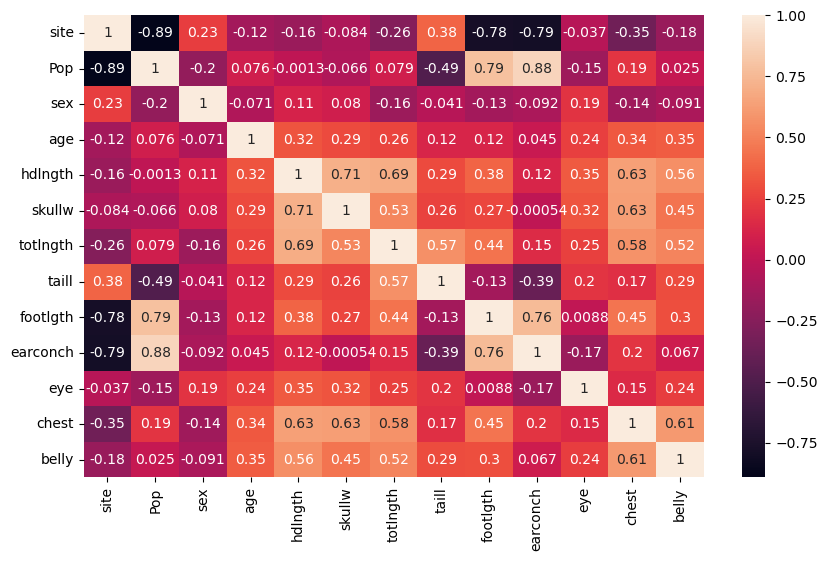

In [145]:
fig, ax = plt.subplots(figsize=(10, 6))
hm = sns.heatmap(df.corr(), cbar=True, annot=True)

In [147]:
df_cut_1 = df[['hdlngth', 'totlngth']]
df_cut_1.head(3)


,hdlngth,totlngth
0,94.1,89.0
1,92.5,91.5
2,94.0,95.5


In [149]:
df_cut_1[df_cut_1.duplicated()].shape[0]


2

In [151]:
df_cut_1 = df_cut_1.drop_duplicates()
df_cut_1[df_cut_1.duplicated()].shape[0]

0

In [153]:
df_cut_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 103
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hdlngth   102 non-null    float64
 1   totlngth  102 non-null    float64
dtypes: float64(2)
memory usage: 2.4 KB


In [155]:
df_cut_1.corr()


,hdlngth,totlngth
hdlngth,1.000000,0.691531
totlngth,0.691531,1.000000


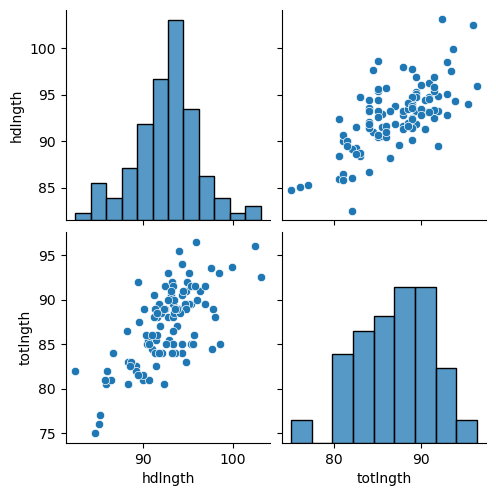

In [157]:
sns.pairplot(df_cut_1)


In [163]:
import statsmodels.formula.api as smf


In [166]:
model_1 = smf.ols(formula = 'hdlngth ~ totlngth', data = df_cut_1)


In [168]:
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                hdlngth   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     91.65
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           8.53e-16
Time:                        16:22:56   Log-Likelihood:                -241.79
No. Observations:                 102   AIC:                             487.6
Df Residuals:                     100   BIC:                             492.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6989      5.221      8.178      0.0

In [170]:
df_cut_1['Predicted_hdlngth'] = result_1.params['totlngth'] * df_cut_1['totlngth'] + result_1.params['Intercept']
df_cut_1.head(3)

,hdlngth,totlngth,Predicted_hdlngth
0,94.1,89.0,93.722203
1,92.5,91.5,95.155443
2,94.0,95.5,97.448626


In [172]:
print('Approximation error =', np.round((100 * mean_absolute_percentage_error(df_cut_1['hdlngth'], df_cut_1['Predicted_hdlngth'])), 2), '%')

Approximation error = 2.14 %


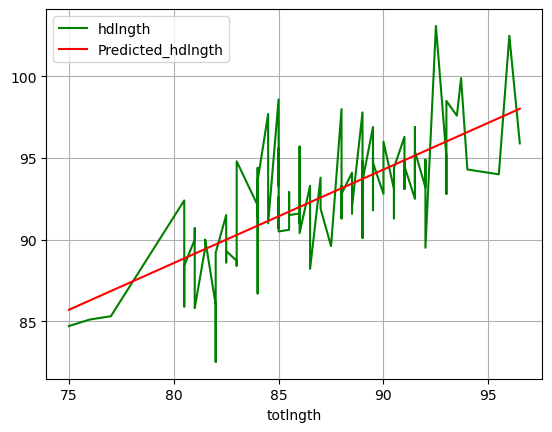

In [174]:
df_cut_1 = df_cut_1.sort_values(by=['totlngth'])
ax = plt.gca()
df_cut_1.plot(kind = 'line', x = 'totlngth', y = 'hdlngth', color='green', ax = ax)
df_cut_1.plot(kind = 'line', x = 'totlngth', y = 'Predicted_hdlngth', color='red', ax=ax)
plt.grid()
plt.show()